04_ML_WS_04_(telco_customer_kaggle)

### Import

In [17]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import sys
from sklearn import metrics
              
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.style.use('classic')
sns.set_style("white")

In [18]:
dataset = pd.read_csv('telco_customer.csv')

In [19]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
lab = dataset["Churn"].value_counts().keys().tolist()
val = dataset["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

<AxesSubplot:xlabel='Churn', ylabel='count'>

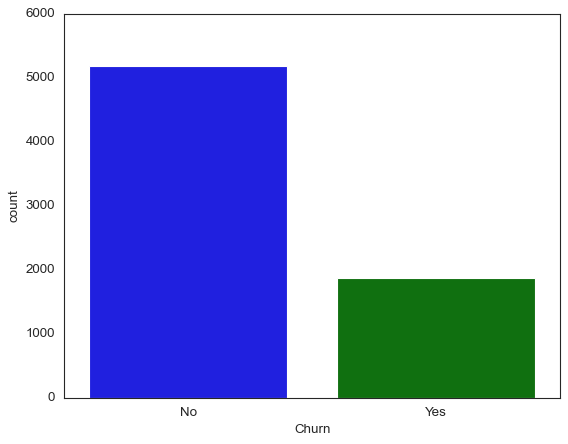

In [22]:
sns.countplot(x= 'Churn', data = dataset)

## **Detection of bad lines.**

**In some lines of the data set, a space character is assigned instead of 'nan' value. This situation causes meaning confusion. We detect these lines through a loop.**

In [23]:
for i in range(len(dataset['TotalCharges'])):
    if dataset.iloc[i,19] == ' ':
        print(i)

488
753
936
1082
1340
3331
3826
4380
5218
6670
6754


In [24]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace(' ', np.nan)

dataset = dataset[dataset['TotalCharges'].notnull()]
dataset = dataset.reset_index()[dataset.columns]

dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)

replace_columns = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']

for i in replace_columns:
    dataset[i] = dataset[i].replace({'No internet service' : 'No'})
    
dataset['MultipleLines'] = dataset['MultipleLines'].replace({'No phone service' : 'No'})

In [25]:
print ("Rows     : " ,dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist())
print ("\nMissing values :  ", dataset.isnull().sum().values.sum())
print ("\nUnique values :  \n",dataset.nunique())

print(dataset['Contract'].unique())
print(dataset['PaymentMethod'].unique())
print(dataset['InternetService'].unique())

Rows     :  7032
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64
['Month-to-month' 'One year' 'Two year']
['Electro

In [26]:
slice_df = pd.concat([dataset.iloc[:,1:8],dataset.iloc[:,9:15], dataset.iloc[:,16:17], dataset.iloc[:,18:]], axis = 1)

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encode_columns = [ 'gender', 'Partner', 'Dependents','PhoneService','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for i in encode_columns:
    slice_df[i] = le.fit_transform(slice_df[i])

churn = slice_df.iloc[:,-1:]
slice_df = slice_df.iloc[:,:-1]

internet_service = dataset.iloc[:,8:9]
contract = dataset.iloc[:,-6:-5]
payment_method = dataset.iloc[:,-4:-3]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
internet_service = ohe.fit_transform(internet_service).toarray()
contract = ohe.fit_transform(contract).toarray()
payment_method = ohe.fit_transform(payment_method).toarray()

In [28]:
internet_service = pd.DataFrame(data = internet_service, index = range(len(internet_service)), columns = ['DSL','Fiber optic', 'No internet service'])
contract = pd.DataFrame(data = contract, index = range(len(contract)), columns = ['Month-to-month', 'One year', 'Two year'])
payment_method = pd.DataFrame(data = payment_method, index = range(len(payment_method)), columns = ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'])

X = pd.concat([slice_df, internet_service, contract, payment_method], axis = 1)
X = X.values
Y = churn.values

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [31]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

classifier = Sequential(layers = None, name = None)

classifier.add(Dense(128, activation = 'tanh')) 
classifier.add(Dense(256, activation = 'tanh'))  
classifier.add(Dense(512, activation = 'tanh'))
classifier.add(Dense(1024, activation = 'tanh'))
classifier.add(Dense(1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
                        
classifier.fit(X_train, y_train, epochs = 50)

y_pred = classifier.predict(X_test, use_multiprocessing=True, max_queue_size=1)
y_pred = (y_pred > 0.5)

Epoch 1/50
176/176 [==============================] - 3s 10ms/step - loss: 0.4565 - accuracy: 0.7824
Epoch 2/50
176/176 [==============================] - 2s 11ms/step - loss: 0.4356 - accuracy: 0.7925
Epoch 3/50
176/176 [==============================] - 2s 11ms/step - loss: 0.4264 - accuracy: 0.7943
Epoch 4/50
176/176 [==============================] - 2s 10ms/step - loss: 0.4277 - accuracy: 0.7982
Epoch 5/50
176/176 [==============================] - 2s 10ms/step - loss: 0.4275 - accuracy: 0.7988
Epoch 6/50
176/176 [==============================] - 2s 11ms/step - loss: 0.4251 - accuracy: 0.8000
Epoch 7/50
176/176 [==============================] - 2s 11ms/step - loss: 0.4251 - accuracy: 0.7996
Epoch 8/50
176/176 [==============================] - 2s 11ms/step - loss: 0.4238 - accuracy: 0.7963
Epoch 9/50
176/176 [==============================] - 2s 11ms/step - loss: 0.4275 - accuracy: 0.7980
Epoch 10/50
176/176 [==============================] - 2s 10ms/step - loss: 0.4244 - accura

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1038
           1       0.65      0.47      0.55       369

    accuracy                           0.80      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.80      0.78      1407



<AxesSubplot:>

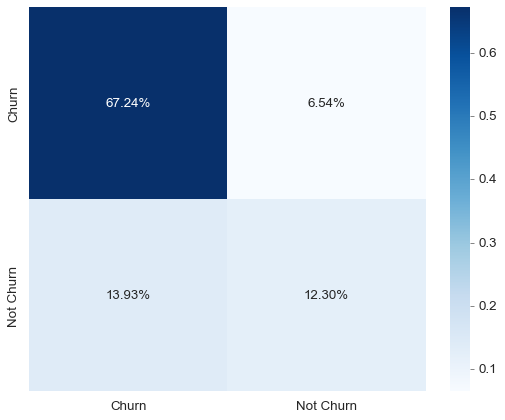

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
categories = ['Churn', 'Not Churn']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), cmap = 'Blues', fmt = '.2%', annot = True, xticklabels = categories, yticklabels = categories)